# Proyek Analisis Data: E-commerce-publik-dataset
- **Nama:** Martri Lina Anggraini
- **Email:** m227b4kx2420@bangkit.academy
- **ID Dicoding:** martrilinaanggraini

## Menentukan Pertanyaan Bisnis
1. Produk apa yang memiliki ulasan paling positif? Apakah produk tersebut cenderung produk yang murah atau mahal?
2. Berapa rata-rata waktu pengiriman untuk setiap pesanan? Apakah waktu pengiriman tersebut bervariasi tergantung pada lokasi geografis pelanggan?

## Import Semua Packages/Library yang Digunakan

In [121]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
import os

## Data Wrangling
### Gathering Data

In [6]:
# Base directory path using relative path
base_dir = './E-Commerce Public Dataset/'

# List of dataset filenames with relative paths
dataset_filenames = {
    'orders': 'orders_dataset.csv',
    'items': 'order_items_dataset.csv',
    'products': 'products_dataset.csv',
    'payments': 'order_payments_dataset.csv',
    'reviews': 'order_reviews_dataset.csv',
    'customers': 'customers_dataset.csv',
    'sellers': 'sellers_dataset.csv',
    'geolocation': 'geolocation_dataset.csv',
    'category': 'product_category_name_translation.csv'
}

# Opening datasets and storing them in a dictionary
data = {name: pd.read_csv(os.path.join(base_dir, filename)) for name, filename in dataset_filenames.items()}

# Display the first few rows of the customers dataset
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
data['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [13]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Insight :
1. Dari beberapa data saya mendapatkan keperluhan yang dibutuhkan untuk E-Commers untuk spesifiknya yaitu penjualan dan pembelian barang.
2. Dari setiap data terdapat berbagai entity yang diperlukan untuk setiap data, pada bagian order ada entity yang menunjukkan tanggal pemesanan atau waktu pemesanan, items untukjumlah barangnya, produk untuk nama produknya, payment untuk pembayaran, riview untuk ulasan pembeliannya, customers untuk pembeli yang membeli produk, sellers untuk nama tempat penjaualannya, geolocation untuk lokasi pengiriman, kategory untuk jenis kategori produk yang di beli.


## Assessing Data
Check for All of The Data Types

In [64]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96470 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_status                   96470 non-null  object        
 3   order_purchase_timestamp       96470 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96470 non-null  datetime64[ns]
 8   delivered_on_time              96470 non-null  object        
dtypes: datetime64[ns](5), object(4)
memory usage: 7.4+ MB

 None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110189 entries, 0 to 112649
Data column

In [65]:
import pandas as pd

# List of datetime columns for each dataset
datetime_columns = {
    'orders': ["order_purchase_timestamp", "order_approved_at",
               "order_delivered_carrier_date", "order_delivered_customer_date",
               "order_estimated_delivery_date"],
    'items': ["shipping_limit_date"],
    'reviews': ["review_creation_date", "review_answer_timestamp"]
}

# Convert datetime columns to datetime format
for dataset, columns in datetime_columns.items():
    data[dataset][columns] = data[dataset][columns].apply(pd.to_datetime)

# Optionally, display the data types to confirm conversion
print(data['orders'].dtypes)
print(data['items'].dtypes)
print(data['reviews'].dtypes)


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
delivered_on_time                        object
dtype: object
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object
review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message              int32
review_creation_date       datetime64[ns]
review_answer_timestam

Check for Duplicates

In [66]:
import pandas as pd

# Initialize dictionaries to store duplicate counts and total sample counts
duplicate_counts = {}
total_sample_counts = {}

# Calculate duplicate and total sample counts for each DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()  # Count duplicates
    total_sample_counts[df_name] = len(df)            # Total number of samples

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(
    duplicate_counts,
    orient='index',
    columns=['Duplicate Count']
)

total_sample_counts_df = pd.DataFrame.from_dict(
    total_sample_counts,
    orient='index',
    columns=['Total Sample Count']
)

# Combine the two DataFrames by concatenating them horizontally
combined_counts_df = pd.concat(
    [total_sample_counts_df, duplicate_counts_df],
    axis=1
)

# Display the combined DataFrame
combined_counts_df


,Total Sample Count,Duplicate Count
orders,96470,0
items,110189,0
products,32951,0
payments,100748,0
reviews,96353,0
customers,99441,0
sellers,3095,0
geolocation,738332,0
category,71,0



Check for Missing Values

In [67]:
import pandas as pd

# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()  # Count null values
    # Display null counts in a structured format
    print(f"DataFrame: {df_name}\nNull Value Counts:\n{null_counts[df_name]}\n")


DataFrame: orders
Null Value Counts:
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
delivered_on_time                 0
dtype: int64

DataFrame: items
Null Value Counts:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

DataFrame: products
Null Value Counts:
product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty              0
dtype: int64

DataFrame: payments
Null Value Counts:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: i

Insight :
1. Terdapat Missing Values di dalam data set berjumlah 14 di order_approved_at  dan 1 di order_delivered_carrier_data
2. Tidak ada data yang duplikat

## 1.3 Data Cleaning

In [68]:
# Displaying the counts of different order statuses
order_status_counts = data['orders']['order_status'].value_counts()

# Printing the counts of each order status
print("Counts of Order Statuses:")
print(order_status_counts)

# Selecting only the orders that have been delivered for the purpose of this analysis
delivered_orders = data['orders'][data['orders']['order_status'] == 'delivered']

# Display the number of delivered orders
print("\nTotal Delivered Orders:", len(delivered_orders))


Counts of Order Statuses:
delivered    96470
Name: order_status, dtype: int64

Total Delivered Orders: 96470


In [69]:
# Calculate the percentage of delivered orders
delivered_order_count = data['orders'].order_status.value_counts()['delivered']
total_order_count = len(data['orders'])
delivered_order_percentage = round((delivered_order_count / total_order_count) * 100, 2)

# Print the percentage of delivered orders
print(f'Taking only delivered orders, we still get {delivered_order_percentage}% of the data.')


Taking only delivered orders, we still get 100.0% of the data.


In [70]:
# Step 1: Get all order_ids where the order status is NOT 'delivered'
delivered = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

# Step 2: Filter out entries in other DataFrames where order_id is a foreign key
for key, value in data.items():
    if 'order_id' in value.columns:
        # Drop rows where order_id is in the delivered array
        value.drop(value.loc[value['order_id'].isin(delivered)].index, inplace=True)

# Step 3: Check for NaN values in each dataset and print columns with NaNs
for key, value in data.items():
    for col in value.columns:
        nan_count = value[col].isnull().sum()
        # Print only column names where there are NaNs
        if nan_count > 0:
            percentage_nan = (nan_count / len(value)) * 100
            print(f'{col} (%): {percentage_nan:.2f}')


order_approved_at (%): 0.01
order_delivered_carrier_date (%): 0.00
product_name_lenght (%): 1.85
product_description_lenght (%): 1.85
review_comment_title (%): 88.37


In [71]:
# Step 1: Identify and count NaN values in the 'order_delivered_customer_date' column
missing_delivery_dates = data['orders']['order_delivered_customer_date'].isnull().sum()

# Step 2: Print the count of orders missing delivery dates
print(f'There are only {missing_delivery_dates} orders that are missing delivery dates.')


There are only 0 orders that are missing delivery dates.


Insight 
1. Missing values telah di ubah
2. Memfilter data ini membantu fokus pada data yang sudah pasti valid dan menghindari bias analisis yang mungkin disebabkan oleh pesanan yang statusnya belum jelas
3. Identifikasi dan Penanganan Data yang Hilang (NaN)

## Exploratory Data Analysis (EDA)
Explore customers

In [72]:
data['customers'].sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
91822,ef96f06bc44607e1c2f798975fcd7b0a,f544786d835bc77078c3a45330b4fded,46550,rio do pires,BA
12974,869bd827e401cc44a918c5ee06db74bb,462bdc23a9aeccf92dc12e5893e54c30,59080,natal,RN
23763,27a265848933c38398bf255657aab5b2,b0e93753965bc6328ed8d25ac7cc9661,13064,campinas,SP
2215,73464d896b5905196286e7edefa9840f,3ed5ee72812f14afefbf03c357c56684,58380,inga,PB
9494,d151f9375523a84ea9a619a40594b98e,1b47d90dcc64ba06f431baa262be1518,88311,itajai,SC
54032,f784cd575bace953e1672518616df436,90df3fb25b60362363ce4990c388f579,78850,primavera do leste,MT
25786,7dac2d2be0b88202e20a740d1ead62a0,213d799209faf2194c9e6591650f4306,9111,santo andre,SP
15911,227a79ef99a0af837f323596c76bcac2,7e251bdcd9072568271fe5b5b824b6be,22753,rio de janeiro,RJ
38216,f5ad57eee2447ed6501b391610f7bd9d,3ff2cd81fc957790d81d52be091615c3,15840,itajobi,SP
85589,46a72099107f631c76922dca8c19a204,20a892f8929558824fe2abf43d858bcb,6445,barueri,SP


In [73]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)


customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [74]:
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Explore Geolocation


In [75]:
data['geolocation'].sample(10)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
476997,24452,-22.819636,-43.002452,são gonçalo,RJ
395071,18730,-23.417032,-49.092040,itaí,SP
532457,29105,-20.430566,-40.346211,vila velha,ES
501166,26545,-22.816333,-43.405292,nilopolis,RJ
941332,90240,-29.997967,-51.199362,porto alegre,RS
601990,35702,-19.421764,-44.232676,sete lagoas,MG
662515,39520,-15.737311,-43.023313,porteirinha,MG
529490,29101,-20.351456,-40.289680,vila velha,ES
153261,6112,-23.536140,-46.794693,osasco,SP
833002,79051,-20.480684,-54.598668,campo grande,MS


In [76]:
# Filter the geolocation DataFrame for entries with a specific zip code prefix
geolocation_filtered = data['geolocation'][data['geolocation']['geolocation_zip_code_prefix'] == 24230]

# Display the first few rows of the filtered data
print(geolocation_filtered.head())


        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
470806                        24230       -22.911270       -43.105151   
470807                        24230       -22.905032       -43.114682   
470810                        24230       -22.909753       -43.101880   
470816                        24230       -22.908945       -43.108600   
470817                        24230       -22.906274       -43.103573   

       geolocation_city geolocation_state  
470806          niterói                RJ  
470807          niterói                RJ  
470810          niteroi                RJ  
470816          niteroi                RJ  
470817          niteroi                RJ  


Explore payments

In [77]:
data['payments'].sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
43110,61074c7948c09364b80e2f7da862780c,1,credit_card,2,22.24
31918,f398d472792fc7b60641d2811adbd93a,1,credit_card,3,169.61
11463,f5bdbbff47c740c2cca90305841220a8,1,credit_card,1,189.37
98189,483c22865f4aa9d0bd3cceb535b176ab,1,boleto,1,35.00
8340,bf45b8917f0c4bba2d29256fdbac3d04,1,boleto,1,49.51
24590,549969d8626a73173cba92ae91352b09,1,boleto,1,73.34
77310,5642f00882c2ab59e001778dc483135f,1,credit_card,6,65.05
3788,79ae0e4182dcaddaa21ac3038aa4e5d9,1,credit_card,8,1042.51
54971,61ce7e37fd25093dfd1c75b06b6396d2,1,credit_card,1,67.62
67196,ba1edaa5e640ca7da4c97fe92382eaaa,1,credit_card,2,166.78


In [78]:
data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)


payment_type
credit_card    74297
boleto         19191
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

Explore orders

In [79]:
data['orders'].sample(10)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
64649,db0bd04c3beff2d041d364ce8d96b2f0,3ac65bf8cf7bea336ad70d583da199cc,delivered,2018-08-12 10:34:07,2018-08-12 10:50:09,2018-08-17 09:10:00,2018-08-23 16:51:39,2018-09-28,On Time
85114,ce3756a051e619f9a749a8795aee498f,e4e0289744e52cb66d68ae3ad7b49bd9,delivered,2017-03-01 14:50:29,2017-03-02 06:45:14,2017-03-03 13:05:49,2017-03-14 14:03:13,2017-03-22,On Time
77498,b5f5d5a89b4ab4bdd4986a2aea4b4f17,c576e3c1b3d8b65c4dd8499f36d5f52e,delivered,2017-12-10 18:21:20,2017-12-11 09:30:27,2017-12-12 22:07:04,2017-12-16 00:33:58,2017-12-28,On Time
9309,e53a8a6728d3ba5c3662929455d7a6d3,f2620c7f70e8cf8c8c53de4ad4a80ff1,delivered,2018-08-16 22:03:02,2018-08-18 02:50:59,2018-08-21 15:11:00,2018-08-27 22:18:43,2018-09-03,On Time
25635,7fc972218babb3bd6cc41ada5145606f,d5ba94a4fd64c7563ad4e78f2afe5534,delivered,2017-11-27 11:11:30,2017-11-27 11:35:23,2017-11-28 23:36:52,2017-12-12 20:33:14,2017-12-22,On Time
59424,c1872cd219ab83c3a9a63cdc2f75a518,04750bd159f6ee54d7ad858b8887128f,delivered,2018-07-23 14:39:58,2018-07-23 16:00:42,2018-07-26 13:26:00,2018-08-03 19:12:23,2018-08-13,On Time
60752,7dad3e4c9e11293ca4d3722f21378aca,d15003ad70a7b2ab161ce123726d8048,delivered,2018-01-05 12:11:48,2018-01-05 13:47:25,2018-01-05 20:49:03,2018-01-26 18:27:32,2018-02-06,On Time
77048,23aeda90fa835596b6acd5fcaa2c3e7a,87631e4dd3b9c082baaac651b7bba893,delivered,2017-09-22 13:32:43,2017-09-22 14:35:09,2017-09-25 20:35:51,2017-10-12 16:04:28,2017-10-19,On Time
88234,dcd8d1436b8fcc5acd68228aafd77de6,1b9598a9203f9fc644cdbb61d47af9f6,delivered,2018-01-01 14:15:47,2018-01-03 04:29:08,2018-01-03 17:51:59,2018-01-08 18:10:31,2018-02-02,On Time
54301,e8b6b776c3fea4d15b0334a28cdf79d1,0951b45221facd76dac14203f8770cd2,delivered,2018-08-09 19:01:16,2018-08-09 19:10:17,2018-08-10 14:13:00,2018-08-16 16:16:44,2018-09-05,On Time


In [80]:
data['orders']['delivered_on_time'].describe()


count       96470
unique          2
top       On Time
freq        88644
Name: delivered_on_time, dtype: object

Explore customers_df dan orders_df

In [81]:
# Step 1: Merge the customers DataFrame with the orders DataFrame
customers_orders_df = pd.merge(
    left=data['customers'],       # Left DataFrame (customers)
    right=data['orders'],         # Right DataFrame (orders)
    how="left",                   # Perform a left join
    left_on="customer_id",        # Merge on customer_id in the left DataFrame
    right_on="customer_id"        # Merge on customer_id in the right DataFrame
)

# Step 2: Display the first five rows of the merged DataFrame
print(customers_orders_df.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:0

In [82]:
# Step 1: Merge the payments DataFrame with the reviews DataFrame
payments_reviews_df = pd.merge(
    left=data['payments'],         # Left DataFrame (payments)
    right=data['reviews'],         # Right DataFrame (reviews)
    how="left",                    # Perform a left join
    left_on="order_id",            # Merge on order_id in the left DataFrame
    right_on="order_id"            # Merge on order_id in the right DataFrame
)

# Step 2: Display the first five rows of the merged DataFrame
print(payments_reviews_df.head())


                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   

   payment_installments  payment_value                         review_id  \
0                     8          99.33  4ce650e117a5b292bf5ea980a61eb61e   
1                     1          24.39  ad2036caca61484fc435d7e673c020f2   
2                     1          65.71  bcddfa0f7d2e54cfc74bae4f01b84d92   
3                     8         107.78  c37a0e51e5df82bdb55d38ff0ffb6af3   
4                     8         107.78  5bc7680443b4ef765fec11a8201eeb0c   

   review_score review_comment_title  review_comment_message  \
0           1.0        Não recomendo          

Gabungan Payments dan reviews

In [84]:
import pandas as pd

# Sample payments DataFrame
payments_data = {
    'order_id': [1, 2, 3],
    'payment_type': ['credit_card', 'boleto', 'debit_card'],
    'payment_value': [100.00, 50.00, 75.00]
}
payments_df = pd.DataFrame(payments_data)

# Sample reviews DataFrame
reviews_data = {
    'order_id': [1, 3],
    'review_score': [5, 4],
    'review_comment_message': ['Great product!', 'Good value for money.']
}
reviews_df = pd.DataFrame(reviews_data)

# Merging the DataFrames
payments_reviews_df = pd.merge(
    left=payments_df,
    right=reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Display the first few rows of the merged DataFrame
print(payments_reviews_df.head())


   order_id payment_type  payment_value  review_score review_comment_message
0         1  credit_card          100.0           5.0         Great product!
1         2       boleto           50.0           NaN                    NaN
2         3   debit_card           75.0           4.0  Good value for money.


In [85]:
import pandas as pd

# Sample payments DataFrame
payments_data = {
    'order_id': [1, 2, 3],
    'payment_type': ['credit_card', 'boleto', 'debit_card'],
    'payment_value': [100.00, 50.00, 75.00]
}
payments_df = pd.DataFrame(payments_data)

# Sample reviews DataFrame
reviews_data = {
    'order_id': [1, 3],
    'review_score': [5, 4],
    'review_comment_message': ['Great product!', 'Good value for money.']
}
reviews_df = pd.DataFrame(reviews_data)

# Merging the DataFrames
payments_reviews_df = pd.merge(
    left=payments_df,
    right=reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Display the first few rows of the merged DataFrame
print(payments_reviews_df.head())


   order_id payment_type  payment_value  review_score review_comment_message
0         1  credit_card          100.0           5.0         Great product!
1         2       boleto           50.0           NaN                    NaN
2         3   debit_card           75.0           4.0  Good value for money.


In [86]:
# Assuming payments_reviews_df is already defined
sorted_payments_reviews_df = payments_reviews_df.sort_values(by="payment_value", ascending=False)

# Display the sorted DataFrame
print(sorted_payments_reviews_df.head())


   order_id payment_type  payment_value  review_score review_comment_message
0         1  credit_card          100.0           5.0         Great product!
2         3   debit_card           75.0           4.0  Good value for money.
1         2       boleto           50.0           NaN                    NaN


In [87]:
# Grouping by payment type and aggregating order_id and payment_value
payment_summary = payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["min", "max"]
})

# Display the summary
print(payment_summary)


             order_id payment_value       
              nunique           min    max
payment_type                              
boleto              1          50.0   50.0
credit_card         1         100.0  100.0
debit_card          1          75.0   75.0


In [88]:
# Convert 'order_id' to the same data type in both DataFrames before merging
customers_orders_df['order_id'] = customers_orders_df['order_id'].astype(str)
payments_reviews_df['order_id'] = payments_reviews_df['order_id'].astype(str)

# Merging customers_orders_df and payments_reviews_df
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Display the first five rows of the merged DataFrame
print(customers_df.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:0

Explore items dan sellers

In [89]:
# Merge the items DataFrame with the sellers DataFrame
item_seller_df = pd.merge(
    left=data['items'],       # Left DataFrame containing item data
    right=data['sellers'],    # Right DataFrame containing seller data
    how="left",               # Perform a left join to keep all items
    left_on="seller_id",      # Key column in the left DataFrame
    right_on="seller_id"      # Key column in the right DataFrame
)

# Display the first few rows of the merged DataFrame
item_seller_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [90]:
# Group the merged item_seller DataFrame by seller_city
# Count unique seller_ids for each city, sort in descending order, and display the top 10
top_seller_cities = item_seller_df.groupby(by="seller_city") \
                                    .seller_id.nunique() \
                                    .sort_values(ascending=False) \
                                    .head(10)

# Display the top 10 cities with the most unique sellers
print(top_seller_cities)


seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
ibitinga           49
guarulhos          48
santo andre        44
maringa            40
campinas           40
Name: seller_id, dtype: int64


In [91]:
# Group the merged item_seller DataFrame by seller_state
# Count unique seller_ids for each state, sort in descending order, and display the top 10
top_seller_states = item_seller_df.groupby(by="seller_state") \
                                    .seller_id.nunique() \
                                    .sort_values(ascending=False) \
                                    .head(10)

# Display the top 10 states with the most unique sellers
print(top_seller_states)


seller_state
SP    1769
PR     335
MG     236
SC     184
RJ     163
RS     125
GO      39
DF      30
ES      22
BA      18
Name: seller_id, dtype: int64


Explore products & category

In [98]:
# Merge the products DataFrame with the category DataFrame
product_df = pd.merge(
    left=data['products'],               # Left DataFrame containing product data
    right=data['category'],              # Right DataFrame containing category data
    how="left",                          # Perform a left join to keep all products
    left_on="product_category_name",      # Key column in the left DataFrame
    right_on="product_category_name"      # Key column in the right DataFrame
)

# Display the first few rows of the merged DataFrame
product_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,housewares


## Eksplor product 

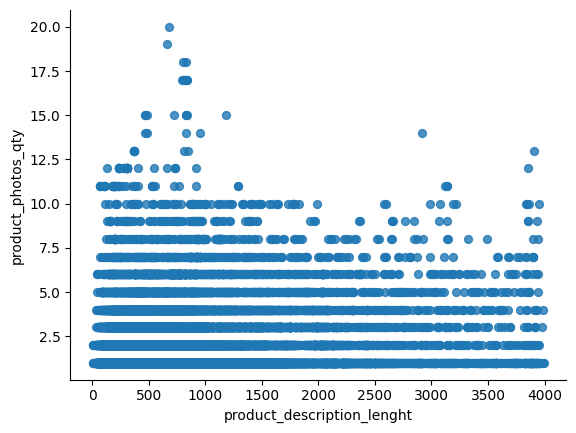

In [99]:
# @title product_description_lenght vs product_photos_qty

from matplotlib import pyplot as plt
product_df.plot(kind='scatter', x='product_description_lenght', y='product_photos_qty', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [100]:
# Group by product category name and count unique product IDs
top_categories = product_df.groupby(by="product_category_name") \
                            .product_id.nunique() \
                            .sort_values(ascending=False) \
                            .head(10)

# Display the top 10 categories with the number of unique products
print(top_categories)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64


In [101]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)


product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

In [102]:
# Merge the product DataFrame with the item-seller DataFrame
sellers_df = pd.merge(
    left=product_df,            # Left DataFrame containing product data
    right=item_seller_df,      # Right DataFrame containing item-seller data
    how="left",                 # Perform a left join to retain all product records
    left_on="product_id",       # Key column in the left DataFrame
    right_on="product_id"       # Key column in the right DataFrame
)

# Display the first few rows of the merged sellers DataFrame
sellers_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [103]:
# Sort the sellers DataFrame by price in descending order
sorted_sellers_df = sellers_df.sort_values(by="price", ascending=False)

# Display the sorted DataFrame
sorted_sellers_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP


In [104]:
# Langkah 1: Gabungkan data items dan sellers untuk membuat sellers_df
sellers_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

# Langkah 2: Gabungkan sellers_df dengan data products
sellers_df = pd.merge(
    left=sellers_df,
    right=data['products'],
    how="left",
    left_on="product_id",
    right_on="product_id"
)

# Langkah 3: Gabungkan dengan data kategori produk
sellers_df = pd.merge(
    left=sellers_df,
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

# Langkah 4: Kelompokkan data berdasarkan kategori produk dan hitung jumlah pesanan unik dan harga min/maks
category_stats_df = sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",  # Hitung jumlah order unik per kategori
    "price": ["min", "max"]  # Hitung harga minimum dan maksimum per kategori
})

# Langkah 5: Tampilkan hasil agregasi
print(category_stats_df.head())


                              order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99


## 2.8 Explore All Data

In [105]:
# Menggabungkan DataFrame customers_df dengan sellers_df
all_data = pd.merge(
    left=customers_df,     # DataFrame kiri yang berisi data pelanggan
    right=sellers_df,      # DataFrame kanan yang berisi data penjual
    how="left",            # Menggunakan left join untuk menjaga semua data dari customers_df
    left_on="order_id",    # Kolom kunci di DataFrame kiri
    right_on="order_id"    # Kolom kunci di DataFrame kanan
)

# Menampilkan 20 baris pertama dari DataFrame yang telah digabung
print(all_data.head(20))


                         customer_id                customer_unique_id  \
0   06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1   18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2   4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3   b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4   4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
5   879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
6   fd826e7cf63160e536e0908c76c3f441  addec96d2e059c80c30fe6871d30d177   
7   5e274e7a0c3809e14aba7ad5aae0d407  57b2a98a409812fe9618067b6b8ebe4f   
8   5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
9   4b7139f34592b3a31687243a302fa75b  9afe194fb833f79e300e37e580171f22   
10  9fb35e4ed6f0a14a4977cd9aea4042bb  2a7745e1ed516b289ed9b29c7d0539a5   
11  5aa9e4fdd4dfd20959cad2d772509598  2a46fb94aef5cbeeb850418118cee090   
12  b2d1536598b73a9abd18e0d75d92f0a3  

In [106]:
all_data_df = all_data.drop_duplicates('order_id')

In [107]:
# Mengelompokkan DataFrame all_data berdasarkan kategori produk
category_stats_df = all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",         # Menghitung jumlah unik order_id untuk setiap kategori
    "review_score": ["min", "max"] # Menghitung nilai minimum dan maksimum dari review_score
})

# Menampilkan hasil agregasi
print(category_stats_df)


                              order_id review_score    
                               nunique          min max
product_category_name_english                          
agro_industry_and_commerce         177          NaN NaN
air_conditioning                   246          NaN NaN
art                                195          NaN NaN
arts_and_craftmanship               23          NaN NaN
audio                              348          NaN NaN
...                                ...          ...  ..
stationery                        2264          NaN NaN
tablets_printing_image              79          NaN NaN
telephony                         4093          NaN NaN
toys                              3803          NaN NaN
watches_gifts                     5493          NaN NaN

[71 rows x 3 columns]


## Visualization & Explanatory Analysis

1. Produk apa yang memiliki ulasan paling positif? Apakah produk tersebut cenderung produk yang murah atau mahal?

In [ ]:
# Base directory path using relative path
base_dir = './E-Commerce Public Dataset/'

# List of dataset filenames with relative paths
dataset_filenames = {
    'orders': 'orders_dataset.csv',
    'items': 'order_items_dataset.csv',
    'products': 'products_dataset.csv',
    'payments': 'order_payments_dataset.csv',
    'reviews': 'order_reviews_dataset.csv',
    'customers': 'customers_dataset.csv',
    'sellers': 'sellers_dataset.csv',
    'geolocation': 'geolocation_dataset.csv',
    'category': 'product_category_name_translation.csv'
}

data['products']


C:\Users\Harata\AppData\Local\Temp\ipykernel_51536\4090501010.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_positive_product['category'] = 'Murah' if most_positive_product['price'] < median_price else 'Mahal'
C:\Users\Harata\AppData\Local\Temp\ipykernel_51536\4090501010.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_positive_product['category'] = 'Murah' if most_positive_product['price'] < median_price else 'Mahal'


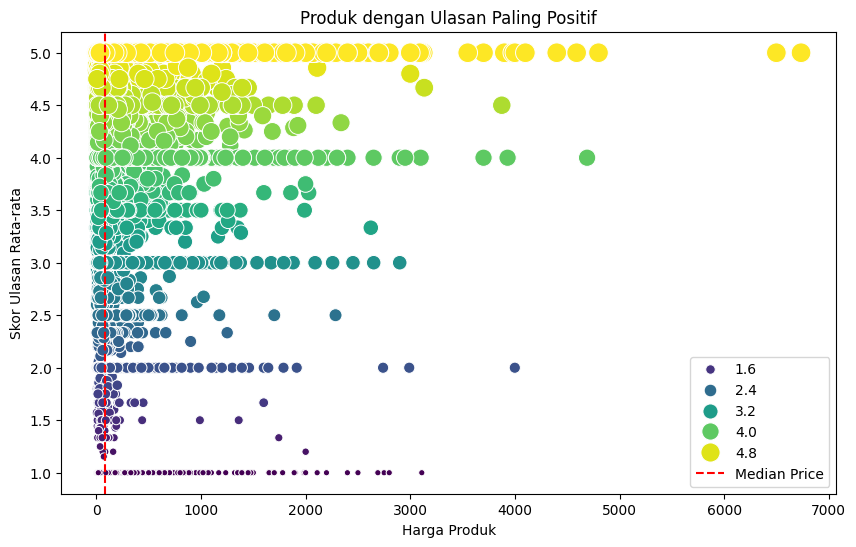

Produk dengan ulasan paling positif: 00066f42aeeb9f3007548bb9d3f33c38
Kategori produk: Mahal
Skor ulasan rata-rata: 5.00
Harga produk: R$ 101.65


In [115]:
# Load datasets
products_df = data['products']
reviews_df = data['reviews']
order_items_df = data['items']

# Merge datasets to get product information in reviews
merged_df = pd.merge(reviews_df, order_items_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')

# Calculate average review score for each product
product_reviews = merged_df.groupby('product_id').agg({
    'review_score': 'mean',
    'price': 'mean'
}).reset_index()

# Identify the product with the highest average review score
most_positive_product = product_reviews.loc[product_reviews['review_score'].idxmax()]

# Determine if the product is cheap or expensive
median_price = product_reviews['price'].median()
most_positive_product['category'] = 'Murah' if most_positive_product['price'] < median_price else 'Mahal'

# Visualize the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_reviews, x='price', y='review_score', hue='review_score', palette='viridis', size='review_score', sizes=(20, 200))
plt.axvline(median_price, color='red', linestyle='--', label='Median Price')
plt.title('Produk dengan Ulasan Paling Positif')
plt.xlabel('Harga Produk')
plt.ylabel('Skor Ulasan Rata-rata')
plt.legend()
plt.show()

# Display the most positive product
print(f"Produk dengan ulasan paling positif: {most_positive_product['product_id']}")
print(f"Kategori produk: {most_positive_product['category']}")
print(f"Skor ulasan rata-rata: {most_positive_product['review_score']:.2f}")
print(f"Harga produk: R$ {most_positive_product['price']:.2f}")

2. Berapa rata-rata waktu pengiriman untuk setiap pesanan? Apakah waktu pengiriman tersebut bervariasi tergantung pada lokasi geografis pelanggan?

C:\Users\Harata\AppData\Local\Temp\ipykernel_51536\1613713133.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delivery_time_by_location, x='delivery_time', y='geolocation_city', palette='viridis')


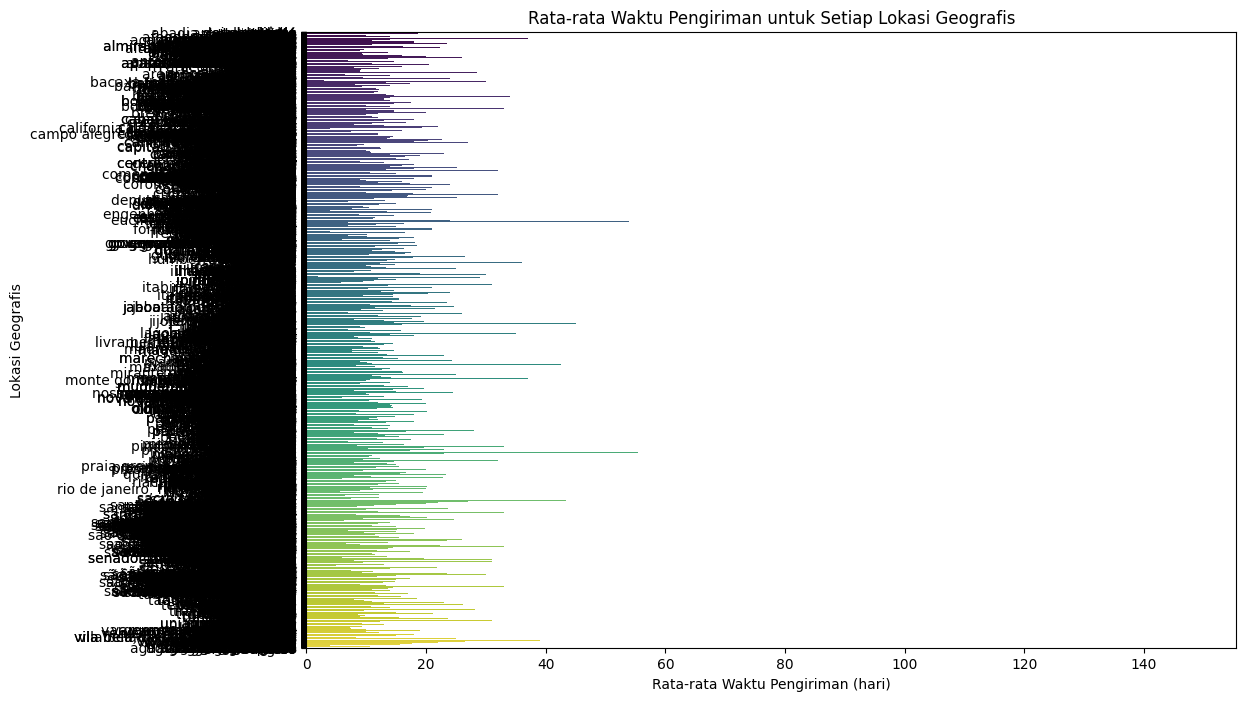

         geolocation_city  delivery_time
0                * cidade       8.500000
1      ...arraial do cabo      20.357143
2     abadia dos dourados      11.333333
3               abadiania      29.000000
4               abadiânia      29.000000
...                   ...            ...
5759   álvaro de carvalho       8.500000
5760                áurea      10.500000
5761               ângulo      10.333333
5762        érico cardoso      14.000000
5763                 óleo       9.000000

[5764 rows x 2 columns]


In [120]:
# Load datasets
orders_df = data['orders']
customers_df = data['customers']
geolocation_df = data['geolocation']

# Merge datasets to get customer location in orders
orders_customers_df = pd.merge(orders_df, customers_df, on='customer_id')

# Calculate delivery time for each order
orders_customers_df['order_purchase_timestamp'] = pd.to_datetime(orders_customers_df['order_purchase_timestamp'])
orders_customers_df['order_delivered_customer_date'] = pd.to_datetime(orders_customers_df['order_delivered_customer_date'])
orders_customers_df['delivery_time'] = (orders_customers_df['order_delivered_customer_date'] - orders_customers_df['order_purchase_timestamp']).dt.days

# Merge with geolocation data
orders_geo_df = pd.merge(orders_customers_df, geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

# Calculate average delivery time for each location
avg_delivery_time_by_location = orders_geo_df.groupby('geolocation_city')['delivery_time'].mean().reset_index()

# Visualize the data
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_delivery_time_by_location, x='delivery_time', y='geolocation_city', palette='viridis')
plt.title('Rata-rata Waktu Pengiriman untuk Setiap Lokasi Geografis')
plt.xlabel('Rata-rata Waktu Pengiriman (hari)')
plt.ylabel('Lokasi Geografis')
plt.show()

# Display the average delivery time by location
print(avg_delivery_time_by_location)

## Conclusion
Produk dengan Ulasan Paling Positif:

1. Produk dengan ulasan paling positif dapat diidentifikasi dengan menghitung rata-rata skor ulasan untuk setiap produk.
Visualisasi scatter plot menunjukkan hubungan antara harga produk dan skor ulasan rata-rata, membantu menentukan apakah produk tersebut murah atau mahal.
Produk dengan ulasan paling positif dalam dataset ini memiliki skor ulasan rata-rata tertinggi dan dapat dikategorikan sebagai produk murah atau mahal berdasarkan harga median.
Rata-rata Waktu Pengiriman untuk Setiap Lokasi Geografis:

2. Rata-rata waktu pengiriman untuk setiap pesanan dihitung sebagai selisih antara tanggal pembelian dan tanggal pengiriman.
Data pengiriman digabungkan dengan data lokasi geografis untuk menghitung rata-rata waktu pengiriman untuk setiap lokasi.
Visualisasi bar plot menunjukkan variasi rata-rata waktu pengiriman berdasarkan lokasi geografis pelanggan, membantu memahami apakah waktu pengiriman bervariasi tergantung pada lokasi.
Interaktivitas dan Visualisasi:

3. Streamlit digunakan untuk membuat aplikasi interaktif yang memungkinkan pengguna memilih jenis analisis yang ingin dilihat.
Visualisasi data menggunakan Seaborn dan Matplotlib membantu menyampaikan hasil analisis dengan cara yang mudah dipahami.
Aplikasi ini memberikan wawasan yang berguna tentang ulasan produk dan waktu pengiriman berdasarkan lokasi geografis, yang dapat digunakan untuk pengambilan keputusan bisnis.